# Tabular Playground Series - Jul 2021

#### Computation Describtion:
In this competition you are predicting the values of air pollution measurements over time, based on basic weather information (temperature and humidity) and the input values of 5 sensors.

The three target values to you to predict are: target_carbon_monoxide, target_benzene, and target_nitrogen_oxides

Files
train.csv - the training data, including the weather data, sensor data, and values for the 3 targets
test.csv - the same format as train.csv, but without the target value; your task is to predict the value for each of these targets.
sample_submission.csv - a sample submission file in the correct format.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test =  pd.read_csv('test.csv')

## EDA
### Data exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.

In [4]:
train.sample(20)

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
6564,2010-12-09 06:00:00,15.1,60.4,1.0335,830.3,510.9,1411.7,996.2,466.1,0.4,0.8,60.4
2820,2010-07-06 06:00:00,22.2,52.0,1.3529,1087.8,955.4,786.5,1744.4,1228.5,1.6,10.5,165.0
3394,2010-07-30 04:00:00,23.2,50.2,1.4795,875.7,686.8,941.3,1388.4,777.0,0.5,3.6,35.4
5743,2010-11-05 01:00:00,17.1,64.4,1.4390,1069.2,926.1,656.1,1467.0,943.0,1.8,9.2,223.6
2330,2010-06-15 20:00:00,25.5,36.2,1.2201,1104.7,1203.3,704.9,1808.6,997.0,2.8,16.1,155.2
5789,2010-11-06 23:00:00,19.0,60.9,1.2702,986.7,859.2,759.1,1427.0,906.2,1.5,8.0,200.9
1861,2010-05-27 07:00:00,16.5,43.7,0.8830,1497.8,1466.7,694.7,2060.0,1605.8,4.7,23.8,227.7
4373,2010-09-08 23:00:00,24.4,31.1,0.9722,1089.0,939.1,925.0,1361.0,1190.8,2.1,10.3,246.0
6915,2010-12-23 21:00:00,6.0,57.9,0.5575,1564.0,1447.4,443.7,1479.6,2159.2,7.2,26.6,1065.2
1655,2010-05-18 17:00:00,31.5,21.5,0.8996,1359.5,1201.3,687.0,1910.5,1216.9,2.9,18.5,146.6


In [5]:
test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [6]:
train.shape, test.shape

((7111, 12), (2247, 9))

In [7]:
df = train.append(test, sort=False).reset_index(drop=True)

In [8]:
df.isnull().sum()

date_time                    0
deg_C                        0
relative_humidity            0
absolute_humidity            0
sensor_1                     0
sensor_2                     0
sensor_3                     0
sensor_4                     0
sensor_5                     0
target_carbon_monoxide    2247
target_benzene            2247
target_nitrogen_oxides    2247
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               9358 non-null   object 
 1   deg_C                   9358 non-null   float64
 2   relative_humidity       9358 non-null   float64
 3   absolute_humidity       9358 non-null   float64
 4   sensor_1                9358 non-null   float64
 5   sensor_2                9358 non-null   float64
 6   sensor_3                9358 non-null   float64
 7   sensor_4                9358 non-null   float64
 8   sensor_5                9358 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 877.4+ KB


In [10]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [11]:
df['day'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

In [12]:
df.drop('date_time', axis=1)

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,day,month,year
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2,3,2010
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2,3,2010
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2,3,2010
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2,3,2010
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,NaN,NaN,NaN,0,4,2011
9354,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,NaN,NaN,NaN,0,4,2011
9355,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,NaN,NaN,NaN,0,4,2011
9356,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,NaN,NaN,NaN,0,4,2011


In [13]:
abs(df.corr()['target_carbon_monoxide']).sort_values(ascending=False)

target_carbon_monoxide    1.000000
target_benzene            0.881884
sensor_1                  0.857215
sensor_5                  0.834501
sensor_2                  0.821025
target_nitrogen_oxides    0.806099
sensor_4                  0.571412
sensor_3                  0.547567
day                       0.136970
month                     0.126663
relative_humidity         0.016589
absolute_humidity         0.013756
deg_C                     0.007503
year                      0.005624
Name: target_carbon_monoxide, dtype: float64

In [14]:
abs(df.corr()['target_benzene']).sort_values(ascending=False)

target_benzene            1.000000
sensor_2                  0.964440
target_carbon_monoxide    0.881884
sensor_5                  0.877662
sensor_1                  0.842534
sensor_4                  0.783750
sensor_3                  0.735545
target_nitrogen_oxides    0.664235
absolute_humidity         0.186293
day                       0.181684
deg_C                     0.109757
month                     0.048538
relative_humidity         0.022895
year                      0.009460
Name: target_benzene, dtype: float64

In [15]:
abs(df.corr()['target_nitrogen_oxides']).sort_values(ascending=False)

target_nitrogen_oxides    1.000000
target_carbon_monoxide    0.806099
sensor_5                  0.708270
target_benzene            0.664235
sensor_1                  0.643044
sensor_2                  0.604795
month                     0.487090
sensor_3                  0.427622
sensor_4                  0.235662
deg_C                     0.205984
relative_humidity         0.178608
day                       0.114830
absolute_humidity         0.101911
year                      0.001074
Name: target_nitrogen_oxides, dtype: float64

### Data Visualization
Creating visual representations of the data to help identify patterns, trends, and outliers.

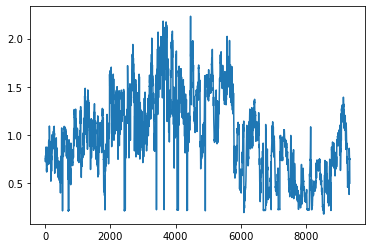

In [16]:
plt.plot(df['absolute_humidity'])

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


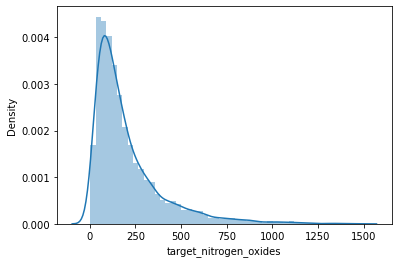

In [17]:
sns.distplot(df['target_nitrogen_oxides']);

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


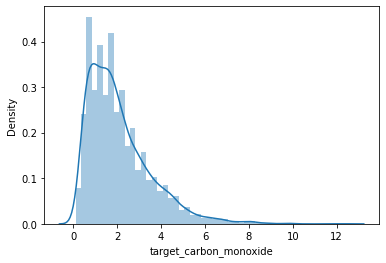

In [18]:
sns.distplot(df['target_carbon_monoxide']);

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


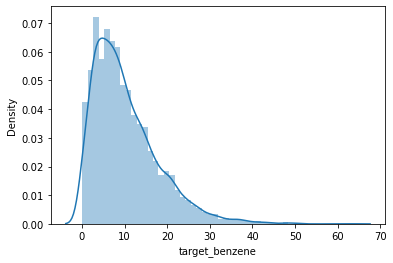

In [19]:
sns.distplot(df['target_benzene']);

<AxesSubplot:xlabel='relative_humidity', ylabel='Count'>

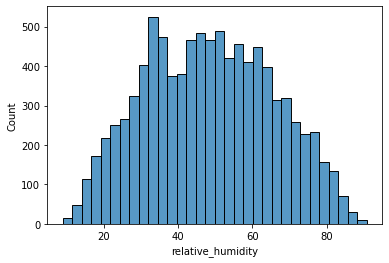

In [20]:
sns.histplot(df['relative_humidity'])

### Data preprocessing
Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

In [21]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#Veriyi ayırmak için kullanıyoruz

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

First target is'target_carbon_monoxide',second 'target_benzene' and thir 'target_nitrogen_oxides'

In [22]:
x = train.drop(columns=['target_carbon_monoxide','date_time'])
y = train['target_carbon_monoxide']

In [23]:
def algo_test(x,y):
  
    L = LinearRegression()
    
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

### Data Modeling 
Creating models to make predictions or classify the data.

In [25]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.935998,0.355806,0.240129
XGradientBooting,0.930906,0.369687,0.240384
Ridge,0.913024,0.414778,0.284504
Linear,0.913014,0.414800,0.284554
ElasticNet,0.896214,0.453089,0.312787
Lasso,0.894968,0.455801,0.314316
Extra Tree,0.855435,0.534745,0.346943


In [26]:
x1 = train.drop(columns=['target_benzene','date_time'])
y1 = train['target_benzene']

In [27]:
def algo_test(x1,y1):
  
    L = LinearRegression()
    
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train1, x_test1, y_train1, y_test1=train_test_split(x1,y1,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train1,y_train1)
             
        r_squared.append(r2_score(y_test1,algo.predict(x_test1)))
        rmse.append(mean_squared_error(y_test1, algo.predict(x_test1))**.5)
        mae.append(mean_absolute_error(y_test1, algo.predict(x_test1)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [28]:
algo_test(x1,y1)

,R_Squared,RMSE,MAE
Gradient Boosting,0.980135,1.068061,0.779104
XGradientBooting,0.979915,1.073975,0.734009
Linear,0.965671,1.404055,1.042469
Ridge,0.965670,1.404089,1.042504
Lasso,0.960634,1.503549,1.129937
ElasticNet,0.960630,1.503615,1.129861
Extra Tree,0.955920,1.591017,1.092691


In [29]:
x2 = train.drop(columns=['target_nitrogen_oxides','date_time'])
y2 = train['target_nitrogen_oxides']

In [30]:
def algo_test(x2,y2):
  
    L = LinearRegression()
    
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train2, x_test2, y_train2, y_test2=train_test_split(x2,y2,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train2,y_train2)
             
        r_squared.append(r2_score(y_test2,algo.predict(x_test2)))
        rmse.append(mean_squared_error(y_test2, algo.predict(x_test2))**.5)
        mae.append(mean_absolute_error(y_test2, algo.predict(x_test2)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [31]:
algo_test(x2,y2)

,R_Squared,RMSE,MAE
Gradient Boosting,0.890774,65.086077,42.044290
XGradientBooting,0.888607,65.728577,39.695968
Linear,0.795527,89.051981,58.917017
Ridge,0.795522,89.053081,58.913097
Lasso,0.794095,89.363213,59.101734
Extra Tree,0.782091,91.931346,54.806184
ElasticNet,0.757002,97.079326,61.344679
